<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C9_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC(fashion_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

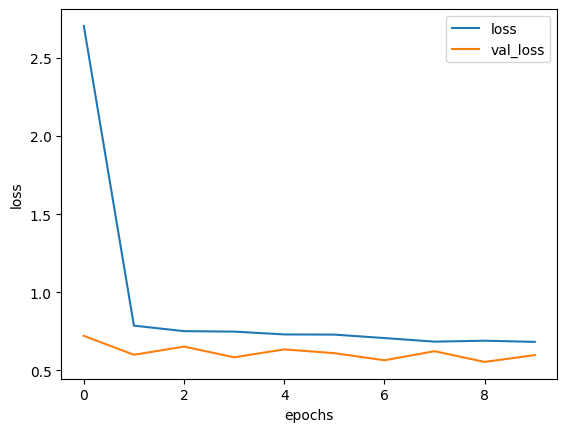

In [3]:
# fashion_mnist 데이터
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 확인
np.set_printoptions(linewidth=120)
print(X_train[0])

# 데이터 확인(이미지)
plt.imshow(X_train[0])

# 정규화 (0~1 사이 값으로) => 정규화 적용 전후 결과 비교할 것
# X_train: 훈련 데이터
# y_train: 학습 데이터
# X_test: 예측 데이터
# y_test: 검증 데이터
#X_train, X_test = X_train / 255.0, X_test / 255.0

# 레이블, 정답 데이터 확인, 학습 데이터
y_train[0]

# 레이블, 정답 데이터 숫자를 인덱스로 한 리스트 생성
classes = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat" ,"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(classes[y_train[0]])

# 데이터 및 정답 확인(이미지, 레이블)
plt.imshow(X_train[1])
print(y_train[1])
print(classes[y_train[1]])

# 데이터 및 정답 확인(이미지, 레이블)
plt.imshow(X_train[9])
print(y_train[9])
print(classes[y_train[9]])

# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'), # 뉴런의 개수
    Dropout(0.2), # 과적합 방지를 목적으로 20% 생략
    Dense(10, activation='softmax') # 0~9 숫자 따라서 예측값 개수는 10개
])


# 모델 요약
model.summary()

# 모델 컴파일, 딥러닝 모델을 학습시키기 위한 데이터를 처리하고, 모델의 구조를 생성하고, 모델의 파라미터를 최적화하는 과정
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 학습(fit) 과정을 시각화하기 과정를 저장
#history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)














In [ ]:
# 학습 과정 정확성 검증을 위한 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


In [ ]:
# 학습 과정 손실 확인 위한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [4]:
# 예측
pred = model.predict(X_test)
type(pred)
pred[1]

313/313 [==============================] - 1s 2ms/step


array([5.39566763e-02, 8.41398444e-03, 5.25403559e-01, 5.05641997e-02, 1.93296120e-01, 7.21142642e-05, 1.54585853e-01,
       9.83134413e-16, 1.37072969e-02, 1.06546814e-07], dtype=float32)

In [5]:
# 가장 높은 값 찾기, np.argmax()는 데이터 중 가장 큰 값의 인덱스를 반환
np.argmax(pred[1])

2

In [6]:
# 예축한 레이블(정답)
classes[np.argmax(pred[1])]

'Pullover'

In [7]:
# 실제 레이블(정답)
classes[y_test[1]]

'Pullover'

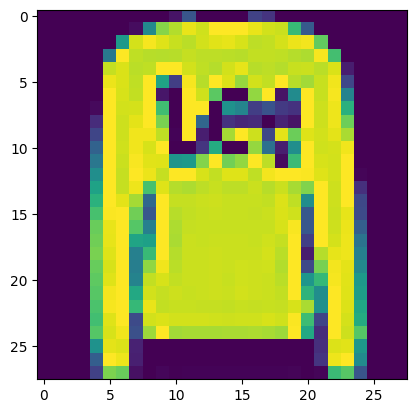

In [8]:
# 검증 데이터 확인(이미지)
plt.imshow(X_test[1])